Predictive Analysis

Analyst = Kofi Anane Poku

Linkedin Profile : linkedin.com/in/kofi-poku-anane


TABLE OF CONTENT

Link to Download Dataset

Link : https://github.com/kananep/datasets/blob/main/president_polls.csv

Link : https://drive.google.com/file/d/1UP0bwupiTVDdJV3207ks1wdGj5S8em2B/view?usp=drive_link

The project consist of the analysis of presidential polls for 2024 American Election to be held on November 5th 2024 . The dataset was sampled to predict the most likely to win the election (The Top 4 candidates)

* Data Preparation was done to clean the data

The Predictive Analysis Section used 

1 . Linear Regression with explaination of the output result

2 . Bar plot illustrating the Top 4 Candidates by percentages values




In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [150]:
president = pd.read_csv('president_polls.csv')
president

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,43.2
1,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,47.4
2,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,36.7
3,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,43.4
4,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,25.0
4697,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,44.0
4698,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,REP,Haley,16640,Nikki Haley,19.0
4699,74681,1674,PEM Management Corporation,1629,John Bolton Super PAC,PEM Management Corporation,675,PEM Management Corporation,NaN,Live Phone,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,46.4


Data Preparation

In [151]:
president.isnull().sum()

poll_id                         0
pollster_id                     0
pollster                        0
sponsor_ids                  2957
sponsors                     2957
display_name                    0
pollster_rating_id              0
pollster_rating_name            0
fte_grade                     178
methodology                    97
transparency_score           3218
state                        3380
start_date                      0
end_date                        0
sponsor_candidate_id         4689
sponsor_candidate            4689
sponsor_candidate_party      4689
question_id                     0
sample_size                    18
population                      0
subpopulation                4701
population_full                 0
tracking                     3917
created_at                      0
notes                        4649
url                             2
source                       4500
internal                     4691
partisan                     4461
race_id       

In [152]:
president.fillna(0 , inplace=True)

In [153]:
president.columns

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'fte_grade', 'methodology', 'transparency_score', 'state', 'start_date',
       'end_date', 'sponsor_candidate_id', 'sponsor_candidate',
       'sponsor_candidate_party', 'question_id', 'sample_size', 'population',
       'subpopulation', 'population_full', 'tracking', 'created_at', 'notes',
       'url', 'source', 'internal', 'partisan', 'race_id', 'cycle',
       'office_type', 'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'party', 'answer', 'candidate_id', 'candidate_name', 'pct'],
      dtype='object')

In [154]:
president_new = president[['candidate_id','candidate_name','pct' ,'party' ,'election_date','race_id','partisan','methodology','fte_grade',]]
president_new.head()

,candidate_id,candidate_name,pct,party,election_date,race_id,partisan,methodology,fte_grade
0,19368,Joe Biden,43.2,DEM,11/5/24,8914,0,IVR/Online Panel/Email,A-
1,16651,Donald Trump,47.4,REP,11/5/24,8914,0,IVR/Online Panel/Email,A-
2,19368,Joe Biden,36.7,DEM,11/5/24,8914,0,IVR/Online Panel/Email,A-
3,16651,Donald Trump,43.4,REP,11/5/24,8914,0,IVR/Online Panel/Email,A-
4,31042,Robert F. Kennedy,6.5,IND,11/5/24,8914,0,IVR/Online Panel/Email,A-


In [155]:
president_new.describe()

,candidate_id,pct,race_id
count,4701.000000,4701.000000,4701.000000
mean,18689.582217,40.181306,8890.099766
std,3391.162062,8.982626,45.692064
min,16638.000000,0.700000,8749.000000
25%,16651.000000,38.000000,8889.000000
50%,16661.000000,42.000000,8914.000000
75%,19368.000000,44.200000,8914.000000
max,31116.000000,67.600000,8914.000000


In [156]:
president_new.dtypes

candidate_id        int64
candidate_name     object
pct               float64
party              object
election_date      object
race_id             int64
partisan           object
methodology        object
fte_grade          object
dtype: object

In [157]:
president_new['election_date']

0       11/5/24
1       11/5/24
2       11/5/24
3       11/5/24
4       11/5/24
         ...   
4696    11/5/24
4697    11/5/24
4698    11/5/24
4699    11/5/24
4700    11/5/24
Name: election_date, Length: 4701, dtype: object

In [158]:
president_new['election_date'] = pd.to_datetime(president_new['election_date'] , format= "%m/%d/%y")

C:\Users\toy\AppData\Local\Temp\ipykernel_4052\3117949099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  president_new['election_date'] = pd.to_datetime(president_new['election_date'] , format= "%m/%d/%y")


Predictive Analysis

In [159]:
president_new.head()

,candidate_id,candidate_name,pct,party,election_date,race_id,partisan,methodology,fte_grade
0,19368,Joe Biden,43.2,DEM,2024-11-05,8914,0,IVR/Online Panel/Email,A-
1,16651,Donald Trump,47.4,REP,2024-11-05,8914,0,IVR/Online Panel/Email,A-
2,19368,Joe Biden,36.7,DEM,2024-11-05,8914,0,IVR/Online Panel/Email,A-
3,16651,Donald Trump,43.4,REP,2024-11-05,8914,0,IVR/Online Panel/Email,A-
4,31042,Robert F. Kennedy,6.5,IND,2024-11-05,8914,0,IVR/Online Panel/Email,A-


array([[<Axes: title={'center': 'candidate_id'}>,
        <Axes: title={'center': 'pct'}>],
       [<Axes: title={'center': 'election_date'}>,
        <Axes: title={'center': 'race_id'}>]], dtype=object)

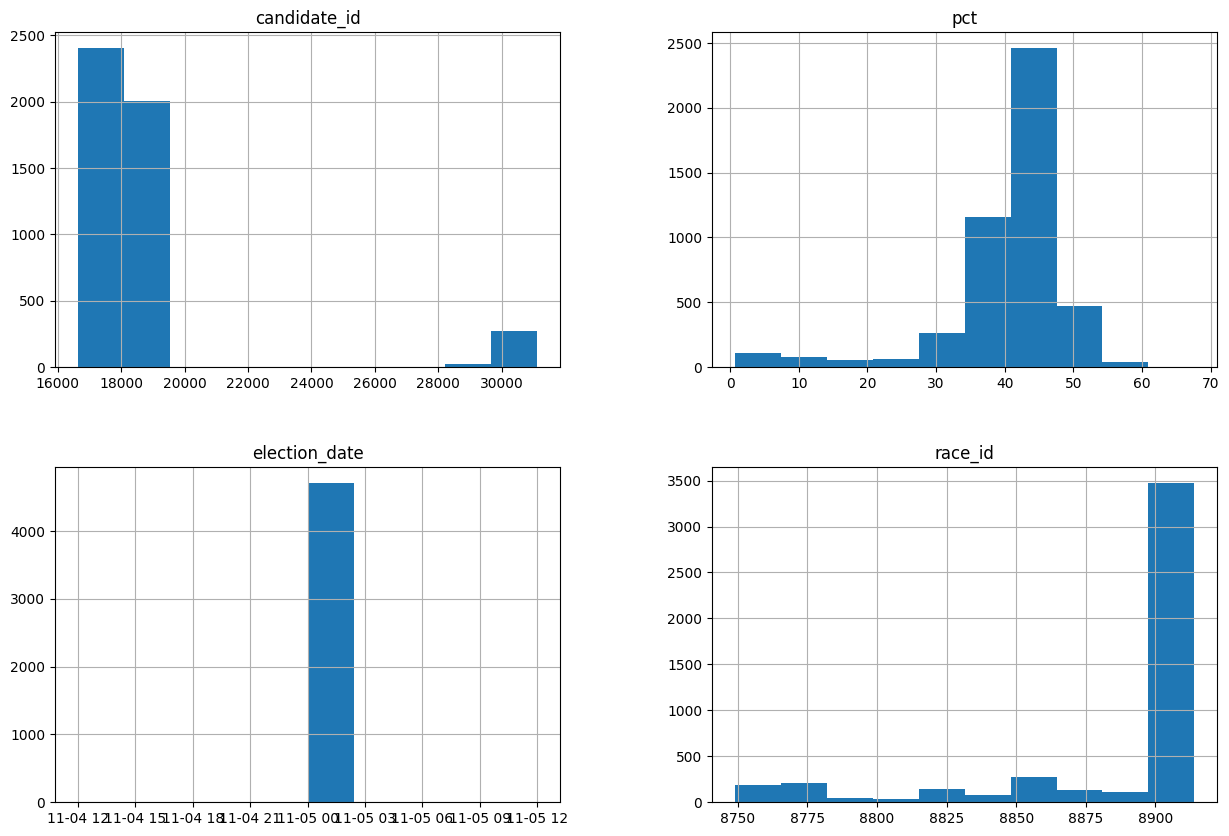

In [160]:
president_new.hist(figsize= (15 , 10))

In [161]:
president_new_correlation = president_new[['candidate_id','pct','race_id']]

<Axes: >

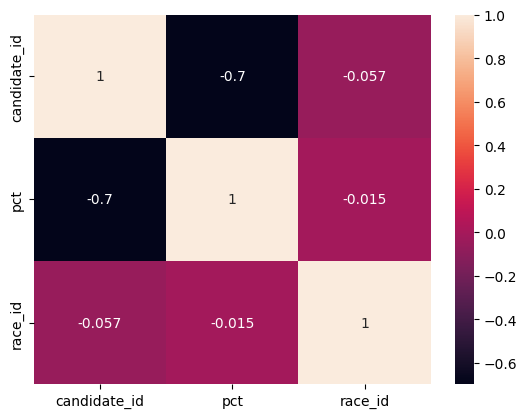

In [162]:
sns.heatmap(president_new_correlation.corr(),
            annot = True)

Linear Regression

In [163]:
import statsmodels.api as sm 
y = president_new['candidate_id']
x = president_new['pct']

In [164]:
x = sm.add_constant(x)
x.head()

,const,pct
0,1.0,43.2
1,1.0,47.4
2,1.0,36.7
3,1.0,43.4
4,1.0,6.5


In [165]:
#Regression model
model1 = sm.OLS(endog = y, exog = x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           candidate_id   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     4475.
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        13:02:28   Log-Likelihood:                -43311.
No. Observations:                4701   AIC:                         8.663e+04
Df Residuals:                    4699   BIC:                         8.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.928e+04    162.282    180.455      0.0

To explain the regression result . The coefficient of pct is -263.6762 meaning as pct decrease by 1 unit the dependent variable candidate_id decreases by -263.6762 .

To predict the most likely to win the 2024 American election is based on the pct estimate , as the pct decrease by 1 unit , the probability of candidate_id losing the election is decrease by -263.6762

Text(0, 0.5, 'candidate id')

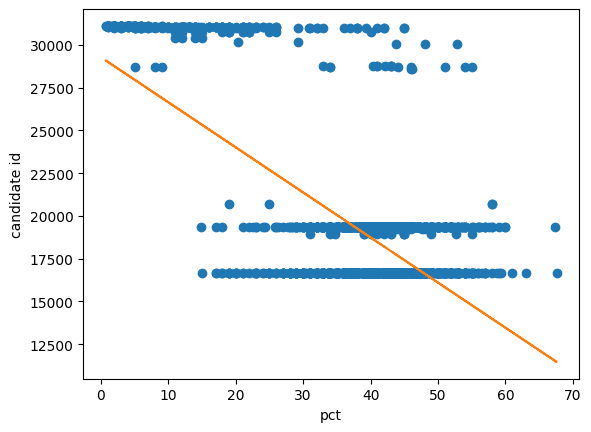

In [166]:
x = president_new['pct']
plt.plot(x, y, 'o')
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
plt.xlabel("pct")
plt.ylabel("candidate id")

The graph explain the regression result above in a visual way , as the pct decreases by 1 unit from 70 to lowest ,  the candidate_id decreases by -263.6762 meaning the probability of the candidate winning the election decreases .

Bar Plot

In [181]:
election_prediction = president_new[president['pct'] > 50].sort_values(by = 'pct' , ascending = False)
election_prediction

,candidate_id,candidate_name,pct,party,election_date,race_id,partisan,methodology,fte_grade
1075,16651,Donald Trump,67.60,REP,2024-11-05,8911,0,Online Panel/Email,A-
1106,19368,Joe Biden,67.40,DEM,2024-11-05,8762,0,Online Panel,0
3917,16651,Donald Trump,63.00,REP,2024-11-05,8866,0,Online Panel,A/B
889,16651,Donald Trump,61.00,REP,2024-11-05,8886,0,0,C
816,19368,Joe Biden,60.00,DEM,2024-11-05,8762,0,Probability Panel,A/B
...,...,...,...,...,...,...,...,...,...
3649,16651,Donald Trump,50.30,REP,2024-11-05,8863,0,IVR/Online Panel/Text-to-Web,A-
3792,19368,Joe Biden,50.20,DEM,2024-11-05,8869,0,IVR/Text-to-Web/Email,A-
1047,16651,Donald Trump,50.20,REP,2024-11-05,8826,0,IVR/Online Panel/Email,A-
4096,19368,Joe Biden,50.20,DEM,2024-11-05,8765,REP,Live Phone/Text-to-Web,C/D


In [187]:
election_prediction = president_new[['candidate_id' ,'candidate_name', 'pct']].sort_values(by='pct' , ascending = False)[:30]
election_prediction

,candidate_id,candidate_name,pct
1075,16651,Donald Trump,67.6
1106,19368,Joe Biden,67.4
3917,16651,Donald Trump,63.0
889,16651,Donald Trump,61.0
4216,19368,Joe Biden,60.0
816,19368,Joe Biden,60.0
1051,16651,Donald Trump,59.3
3068,19368,Joe Biden,59.0
887,16651,Donald Trump,59.0
3679,16651,Donald Trump,58.7


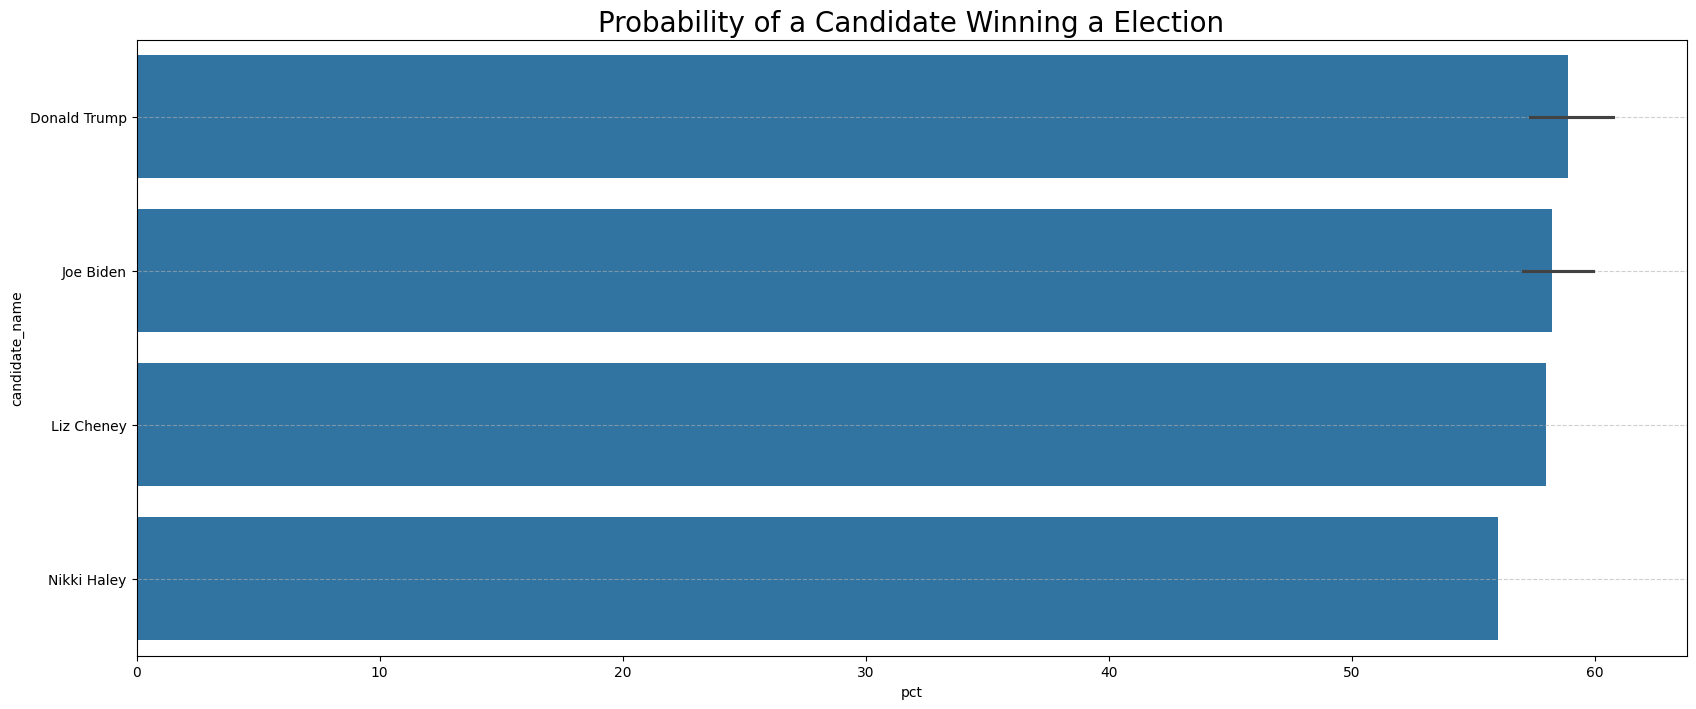

In [188]:
plt.figure( figsize= (20,8))
sns.barplot(data=election_prediction , x= 'pct' , y = 'candidate_name')
plt.title("Probability of a Candidate Winning a Election", fontsize = 20)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()


The graph shows the Top 4 candidates likely to win the 2024 American Election. Donald Trump has the highest estimate rate of winning the 2024 election by probability, followed by Joe Biden ,Liz Cheney and Nikki Haley

CONCLUSION

The model predicts American 2024 election who is likely to win the race by the pct estimates. Linear regression was used for the prediction and the bar plot for illustration 